## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for removing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Preprocessing

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(1460, 81)

In [6]:
corr = df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

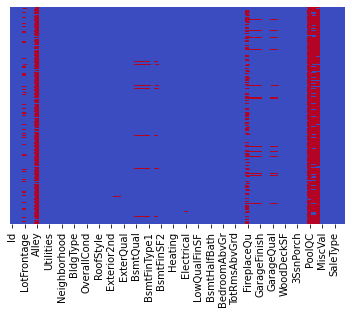

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [9]:
#Dropping features which have high null values or which are not so relevant
df.drop(['PoolQC','Fence','MiscFeature','Alley','Id','GarageYrBlt'],axis=1,inplace=True)

In [10]:
## Fill Missing Values with mode for categorical and mean for continuous features
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [11]:
df.shape

(1460, 75)

In [12]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

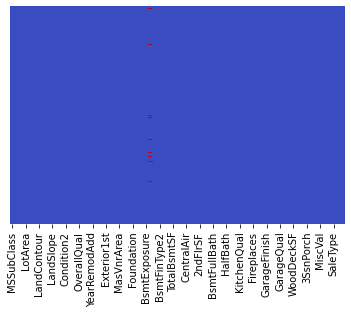

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [14]:
#Dropping the remaining null values as they are very less
df.dropna(inplace=True)

In [15]:
df.shape

(1422, 75)

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
#Handle Categorical Features
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [18]:
len(columns)

39

In [19]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [20]:
test_df.shape

(1459, 74)

In [21]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [22]:
final_df=pd.concat([df,test_df],axis=0)

In [23]:
#There is no saleprice in test data as it is target feature
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [24]:
final_df.shape

(2881, 75)

In [25]:
#onehot encoding the categorical values
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
    
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [26]:
main_df=df.copy()

In [27]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [28]:
final_df.shape

(2881, 235)

In [29]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [30]:
final_df.shape

(2881, 175)

In [31]:
df_final = final_df.drop(['SalePrice'],axis=1)

In [32]:
#Normalizing the data for PCA 
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df_transform = scalar.fit_transform(df_final)

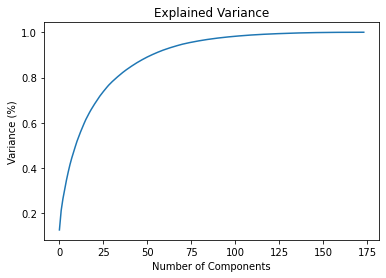

In [33]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(df_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [34]:
pca = PCA(n_components=60)
principalComponents = pca.fit_transform(df_transform)
df_final = pd.DataFrame(principalComponents)
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.374957,0.507279,-0.734305,0.166559,-0.540328,-0.788998,-0.537333,-0.430001,-0.058398,0.213510,...,-0.071656,-0.045782,0.039110,-0.011082,0.045752,0.035592,0.042946,0.128028,-0.009107,0.051379
1,-0.365027,-0.977871,-0.164995,-0.219089,-0.534904,0.112741,0.378390,0.300163,-0.225925,0.217784,...,0.128812,0.125321,-0.141672,0.270264,-0.164756,-0.063683,-0.028697,-0.480173,-0.442352,0.249152
2,1.742287,0.282966,-0.951845,0.428702,-0.403940,-0.016543,0.031227,-0.239797,0.359548,0.372738,...,-0.133136,-0.051604,0.081158,-0.050342,-0.012230,-0.002258,0.057891,0.161044,0.028953,0.047723
3,-0.658065,0.794632,-0.426022,-0.152951,0.637371,1.048850,0.334613,-0.170799,-0.119134,-0.457921,...,0.216011,0.043292,0.019439,-0.003640,-0.068425,0.284673,-0.439591,0.105475,-0.151211,0.047374
4,1.769017,0.293021,-1.121618,0.337571,-0.048977,0.310123,-0.007072,0.125810,-0.346535,0.187086,...,-0.273731,0.453972,-0.125108,0.159688,-0.228599,-0.191250,-0.149214,-0.531572,-0.230655,0.160527


In [35]:
#sns.boxplot(x="variable", y="value", data=pd.melt(final_df))

#plt.show()
#for column in final_df:
    #plt.figure()
    #df.boxplot([column])

In [36]:
X_train=df_final.iloc[:1422,:]
X_test=df_final.iloc[1422:,:]

In [37]:
y_train = final_df['SalePrice'].iloc[:1422,]

In [38]:
X_train.shape

(1422, 60)

In [39]:
X_test.shape

(1459, 60)

### Model Building

In [40]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [42]:
#Choosing K value
score1 = []
# Will take some time
for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    score = cross_val_score(knn, X_train, y_train, cv=k_fold)
    score1.append(round(np.mean(score)*100, 2))

Text(0, 0.5, 'Score')

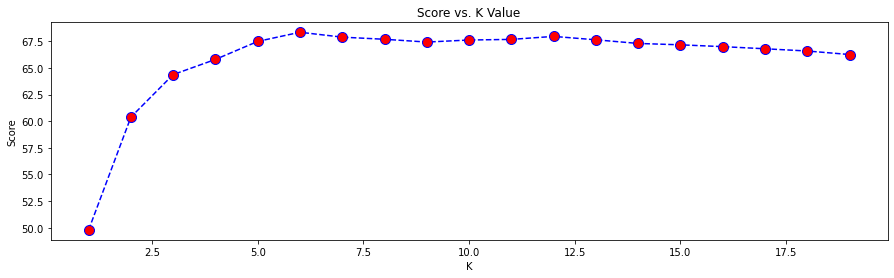

In [43]:
plt.figure(figsize=(15,4))
plt.plot(range(1,20),score1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

In [44]:
reg = KNeighborsRegressor(n_neighbors = 6)
score = cross_val_score(reg, X_train, y_train, cv=k_fold)
print(score)
round(np.mean(score)*100, 2)

[0.66615594 0.65755001 0.71154549 0.68839385 0.70105639 0.63689329
 0.69839963 0.72079848 0.7043931  0.64871571]


68.34

In [85]:
reg = DecisionTreeRegressor()
score = cross_val_score(reg, X_train, y_train, cv=k_fold)
print(score)
round(np.mean(score)*100, 2)

[0.35970483 0.25382739 0.41126928 0.44036345 0.09831774 0.35527792
 0.38991978 0.43623492 0.32778373 0.29043958]


33.63

In [46]:
reg = DecisionTreeRegressor()
score = cross_val_score(reg, X_train, y_train, cv=k_fold)
print(score)
round(np.mean(score)*100, 2)

[0.35389962 0.41514217 0.36493286 0.43322347 0.14354781 0.35812813
 0.32749481 0.41353974 0.19681735 0.43746105]


34.44

In [47]:
reg = RandomForestRegressor(n_estimators=13)
score = cross_val_score(reg, X_train, y_train, cv=k_fold)
print(score)
round(np.mean(score)*100, 2)

[0.61577148 0.69560195 0.65191891 0.66383412 0.68172834 0.65068163
 0.60221403 0.77808786 0.67518827 0.70278143]


67.18

In [48]:
regression = xgboost.XGBRegressor()

In [49]:
reg = xgboost.XGBRegressor()
score = cross_val_score(reg, X_train, y_train, cv=k_fold)
print(score)
round(np.mean(score)*100, 2)

[0.74241618 0.78328722 0.73796346 0.75336776 0.73158929 0.67650114
 0.71927681 0.78985973 0.7071761  0.75786082]


73.99

In [50]:
## Hyper Parameter Optimization showing only for XGBoost due to high computational requirement
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [51]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regression,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [52]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.8min


[23:51:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  9.3min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [53]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=2,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [63]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=2,
             min_child_weight=2, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [64]:
regressor.fit(X_train,y_train)

[23:52:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=2,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [65]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [1]:
#y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))
y_pred=regressor.predict(X_test)

NameError: name 'regressor' is not defined

In [67]:
y_pred

array([106295.766, 144711.28 , 178539.92 , ..., 155574.56 ,  94581.38 ,
       237820.84 ], dtype=float32)

In [68]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Artificial Neural Network Implementation

In [82]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50, kernel_initializer='he_uniform', activation='relu',input_dim=60))

# Adding the second hidden layer
classifier.add(Dense(25, kernel_initializer='he_uniform', activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(50, kernel_initializer='he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
114/114 [==============================] - 0s 4ms/step - loss: 196444.8125 - val_loss: 198415.1094
Epoch 2/1000
114/114 [==============================] - 0s 1ms/step - loss: 196516.2344 - val_loss: 198392.5938
Epoch 3/1000
114/114 [==============================] - 0s 1ms/step - loss: 196026.4531 - val_loss: 198311.1875
Epoch 4/1000
114/114 [==============================] - 0s 1ms/step - loss: 195960.5312 - val_loss: 198097.7188
Epoch 5/1000
114/114 [==============================] - 0s 1ms/step - loss: 195748.7969 - val_loss: 197638.2812
Epoch 6/1000
114/114 [==============================] - 0s 1ms/step - loss: 195210.3750 - val_loss: 196773.9062
Epoch 7/1000
114/114 [==============================] - 0s 1ms/step - loss: 194008.2812 - val_loss: 195320.3438
Epoch 8/1000
114/114 [==============================] - 0s 1ms/step - loss: 191990.6094 - val_loss: 192939.3438
Epoch 9/1000
114/114 [==============================] - 0s 1ms/step - loss: 189327.9219 - val_loss: 1893

114/114 [==============================] - 0s 1ms/step - loss: 24082.0801 - val_loss: 32569.8359
Epoch 148/1000
114/114 [==============================] - 0s 1ms/step - loss: 24620.1035 - val_loss: 32582.6738
Epoch 149/1000
114/114 [==============================] - 0s 1ms/step - loss: 24561.2383 - val_loss: 32494.1621
Epoch 150/1000
114/114 [==============================] - 0s 1ms/step - loss: 24067.0977 - val_loss: 32465.2773
Epoch 151/1000
114/114 [==============================] - 0s 1ms/step - loss: 24616.0312 - val_loss: 32523.1055
Epoch 152/1000
114/114 [==============================] - 0s 1ms/step - loss: 24356.3203 - val_loss: 32488.6875
Epoch 153/1000
114/114 [==============================] - 0s 1ms/step - loss: 24652.4609 - val_loss: 32530.0840
Epoch 154/1000
114/114 [==============================] - 0s 1ms/step - loss: 24408.8164 - val_loss: 32477.9375
Epoch 155/1000
114/114 [==============================] - 0s 1ms/step - loss: 24347.4746 - val_loss: 32451.3164
Epoch 1

114/114 [==============================] - 0s 1ms/step - loss: 21508.6152 - val_loss: 32576.0918
Epoch 294/1000
114/114 [==============================] - 0s 1ms/step - loss: 21402.1172 - val_loss: 32537.1758
Epoch 295/1000
114/114 [==============================] - 0s 1ms/step - loss: 21545.1094 - val_loss: 32425.8457
Epoch 296/1000
114/114 [==============================] - 0s 1ms/step - loss: 21636.5547 - val_loss: 32458.1328
Epoch 297/1000
114/114 [==============================] - 0s 1ms/step - loss: 21384.5957 - val_loss: 32489.2559
Epoch 298/1000
114/114 [==============================] - 0s 1ms/step - loss: 21340.8965 - val_loss: 32395.2109
Epoch 299/1000
114/114 [==============================] - 0s 1ms/step - loss: 21164.7207 - val_loss: 32563.3711
Epoch 300/1000
114/114 [==============================] - 0s 1ms/step - loss: 21326.6895 - val_loss: 32548.6836
Epoch 301/1000
114/114 [==============================] - 0s 1ms/step - loss: 21408.9883 - val_loss: 32626.8145
Epoch 3

114/114 [==============================] - 0s 1ms/step - loss: 20050.7969 - val_loss: 32664.1328
Epoch 367/1000
114/114 [==============================] - 0s 1ms/step - loss: 19958.0840 - val_loss: 32666.1934
Epoch 368/1000
114/114 [==============================] - 0s 1ms/step - loss: 20096.0137 - val_loss: 32758.1328
Epoch 369/1000
114/114 [==============================] - 0s 1ms/step - loss: 19900.3984 - val_loss: 32701.1504
Epoch 370/1000
114/114 [==============================] - 0s 1ms/step - loss: 19980.2461 - val_loss: 32611.8770
Epoch 371/1000
114/114 [==============================] - 0s 1ms/step - loss: 20157.0898 - val_loss: 32716.0605
Epoch 372/1000
114/114 [==============================] - 0s 1ms/step - loss: 20113.3867 - val_loss: 32724.0664
Epoch 373/1000
114/114 [==============================] - 0s 1ms/step - loss: 19955.1875 - val_loss: 32768.2656
Epoch 374/1000
114/114 [==============================] - 0s 1ms/step - loss: 19852.9062 - val_loss: 32701.5430
Epoch 3

114/114 [==============================] - 0s 1ms/step - loss: 17641.1406 - val_loss: 33080.8359
Epoch 513/1000
114/114 [==============================] - 0s 1ms/step - loss: 17982.3613 - val_loss: 33197.5195
Epoch 514/1000
114/114 [==============================] - 0s 1ms/step - loss: 17734.9375 - val_loss: 33169.0547
Epoch 515/1000
114/114 [==============================] - 0s 1ms/step - loss: 17785.8223 - val_loss: 33165.0977
Epoch 516/1000
114/114 [==============================] - 0s 2ms/step - loss: 17456.8145 - val_loss: 33318.7266
Epoch 517/1000
114/114 [==============================] - 0s 1ms/step - loss: 17787.4453 - val_loss: 33362.0586
Epoch 518/1000
114/114 [==============================] - 0s 1ms/step - loss: 17659.1406 - val_loss: 33217.4492
Epoch 519/1000
114/114 [==============================] - 0s 1ms/step - loss: 17654.8047 - val_loss: 33236.4023
Epoch 520/1000
114/114 [==============================] - 0s 1ms/step - loss: 17663.2168 - val_loss: 33341.2930
Epoch 5

114/114 [==============================] - 0s 1ms/step - loss: 15951.0889 - val_loss: 33585.2695
Epoch 659/1000
114/114 [==============================] - 0s 2ms/step - loss: 15926.4629 - val_loss: 33545.1875
Epoch 660/1000
114/114 [==============================] - 0s 2ms/step - loss: 15799.5830 - val_loss: 33662.0312
Epoch 661/1000
114/114 [==============================] - 0s 2ms/step - loss: 15808.3223 - val_loss: 33616.7656
Epoch 662/1000
114/114 [==============================] - 0s 1ms/step - loss: 15923.5518 - val_loss: 33501.0742
Epoch 663/1000
114/114 [==============================] - 0s 2ms/step - loss: 15867.6133 - val_loss: 33474.5234
Epoch 664/1000
114/114 [==============================] - 0s 2ms/step - loss: 15695.3652 - val_loss: 33523.4219
Epoch 665/1000
114/114 [==============================] - ETA: 0s - loss: 16028.294 - 0s 2ms/step - loss: 15999.0137 - val_loss: 33571.3477
Epoch 666/1000
114/114 [==============================] - 0s 1ms/step - loss: 15844.6934 - 

114/114 [==============================] - 0s 1ms/step - loss: 15001.9600 - val_loss: 33502.6719
Epoch 732/1000
114/114 [==============================] - 0s 1ms/step - loss: 15198.4854 - val_loss: 33820.6953
Epoch 733/1000
114/114 [==============================] - 0s 1ms/step - loss: 15207.5215 - val_loss: 33695.4336
Epoch 734/1000
114/114 [==============================] - 0s 1ms/step - loss: 15062.0547 - val_loss: 33640.7422
Epoch 735/1000
114/114 [==============================] - 0s 1ms/step - loss: 15089.1836 - val_loss: 33682.5977
Epoch 736/1000
114/114 [==============================] - 0s 1ms/step - loss: 15125.0430 - val_loss: 33797.3984
Epoch 737/1000
114/114 [==============================] - 0s 1ms/step - loss: 14975.0273 - val_loss: 33847.3125
Epoch 738/1000
114/114 [==============================] - 0s 1ms/step - loss: 15162.8096 - val_loss: 33732.3086
Epoch 739/1000
114/114 [==============================] - 0s 1ms/step - loss: 15135.5303 - val_loss: 33640.6797
Epoch 7

114/114 [==============================] - 0s 1ms/step - loss: 14648.1338 - val_loss: 33785.6992
Epoch 805/1000
114/114 [==============================] - 0s 1ms/step - loss: 14464.2803 - val_loss: 33871.8750
Epoch 806/1000
114/114 [==============================] - 0s 1ms/step - loss: 14623.2910 - val_loss: 33793.4492
Epoch 807/1000
114/114 [==============================] - 0s 1ms/step - loss: 14223.4717 - val_loss: 33804.8828
Epoch 808/1000
114/114 [==============================] - 0s 1ms/step - loss: 14414.6357 - val_loss: 33942.8438
Epoch 809/1000
114/114 [==============================] - 0s 1ms/step - loss: 14235.6201 - val_loss: 33871.8594
Epoch 810/1000
114/114 [==============================] - 0s 1ms/step - loss: 14457.1064 - val_loss: 33861.1836
Epoch 811/1000
114/114 [==============================] - 0s 1ms/step - loss: 14354.4424 - val_loss: 34017.7148
Epoch 812/1000
114/114 [==============================] - 0s 1ms/step - loss: 14251.7109 - val_loss: 33775.7031
Epoch 8

114/114 [==============================] - 0s 2ms/step - loss: 13369.7734 - val_loss: 34212.6562
Epoch 951/1000
114/114 [==============================] - 0s 3ms/step - loss: 13180.0137 - val_loss: 34124.0508
Epoch 952/1000
114/114 [==============================] - 0s 1ms/step - loss: 13112.6426 - val_loss: 34236.2031
Epoch 953/1000
114/114 [==============================] - 0s 3ms/step - loss: 13451.5254 - val_loss: 34178.5156
Epoch 954/1000
114/114 [==============================] - 0s 2ms/step - loss: 13267.1973 - val_loss: 34291.3047
Epoch 955/1000
114/114 [==============================] - 0s 2ms/step - loss: 13123.5742 - val_loss: 34289.7305
Epoch 956/1000
114/114 [==============================] - 0s 2ms/step - loss: 13187.0410 - val_loss: 34202.1211
Epoch 957/1000
114/114 [==============================] - 0s 2ms/step - loss: 13359.7705 - val_loss: 34285.6484
Epoch 958/1000
114/114 [==============================] - 0s 2ms/step - loss: 13219.8223 - val_loss: 34261.0898
Epoch 9

In [83]:
ann_pred=classifier.predict(X_test.values)

In [79]:
from keras import backend as K
def root_mean_squared_error(y_test, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_test)))

In [84]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)